In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score
import numpy as np
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
concreto = pd.read_csv('concrete.csv')

In [ ]:
concreto

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [ ]:
nulos = concreto.isnull()
nulos.sum()
concreto.drop

<bound method DataFrame.drop of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2   

In [ ]:
concreto.rename(columns={'cement':'cimento', 'slag': 'escória', 'ash': 'cinzas', 
                  'water': 'água', 'superplastic': 'superplastificante', 'coarseagg': 'agreg.graúdo', 'fineagg': 'agrer.miúdo', 'age': 'idade', 'strength': 'resistência'}, inplace=True)

In [ ]:
concreto.head(10)

,cimento,escória,cinzas,água,superplastificante,agreg.graúdo,agrer.miúdo,idade,resistência
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [ ]:
duplicados = concreto.duplicated()
duplicados.sum()

25

In [ ]:
concreto.describe().T

,count,mean,std,min,25%,50%,75%,max
cimento,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
escória,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
cinzas,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
água,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastificante,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
agreg.graúdo,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
agrer.miúdo,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
idade,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
resistência,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Text(0.5, 1.0, 'Outliers')

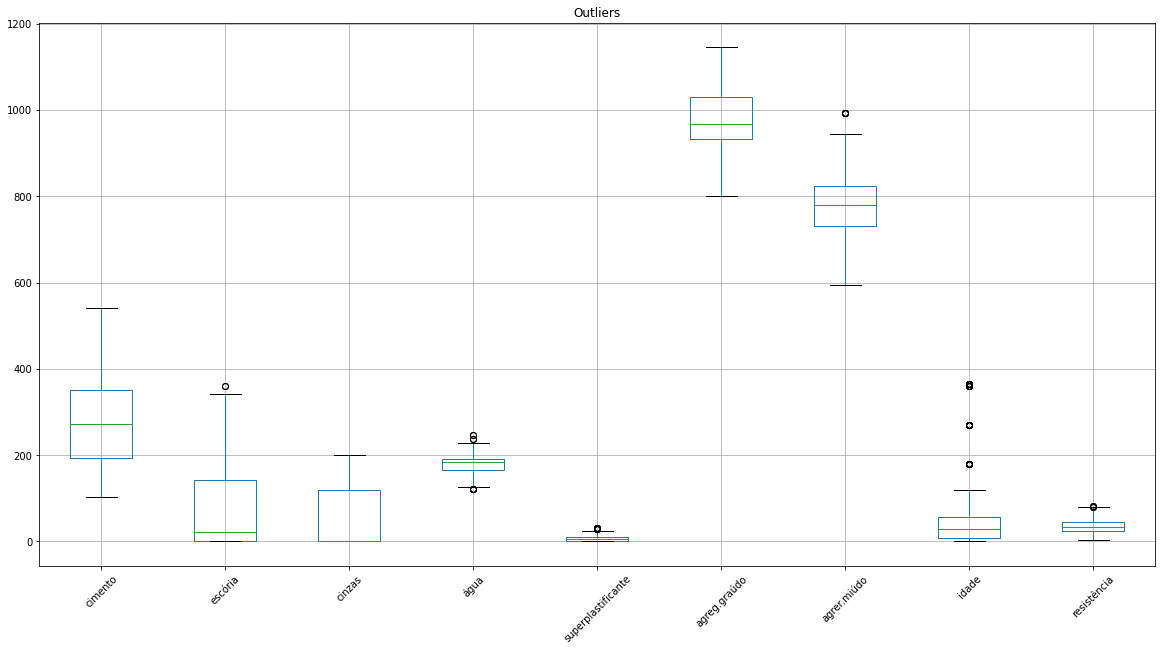

In [ ]:
concreto.boxplot(column = ['cimento', 'escória', 'cinzas', 'água', 'superplastificante', 'agreg.graúdo', 'agrer.miúdo', 'idade', 'resistência'], rot=45, figsize = (20,10))
plt.title('Outliers')


In [ ]:
concreto.drop_duplicates()
concrete_df_outliers = pd.DataFrame(concreto.loc[:,])

Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
    
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
print(i)
print(j)

cimento               157.625
escória               142.950
cinzas                118.300
água                   27.100
superplastificante     10.200
agreg.graúdo           97.400
agrer.miúdo            93.050
idade                  49.000
resistência            22.425
dtype: float64
914
3


Text(0.5, 1.0, 'Outliers')

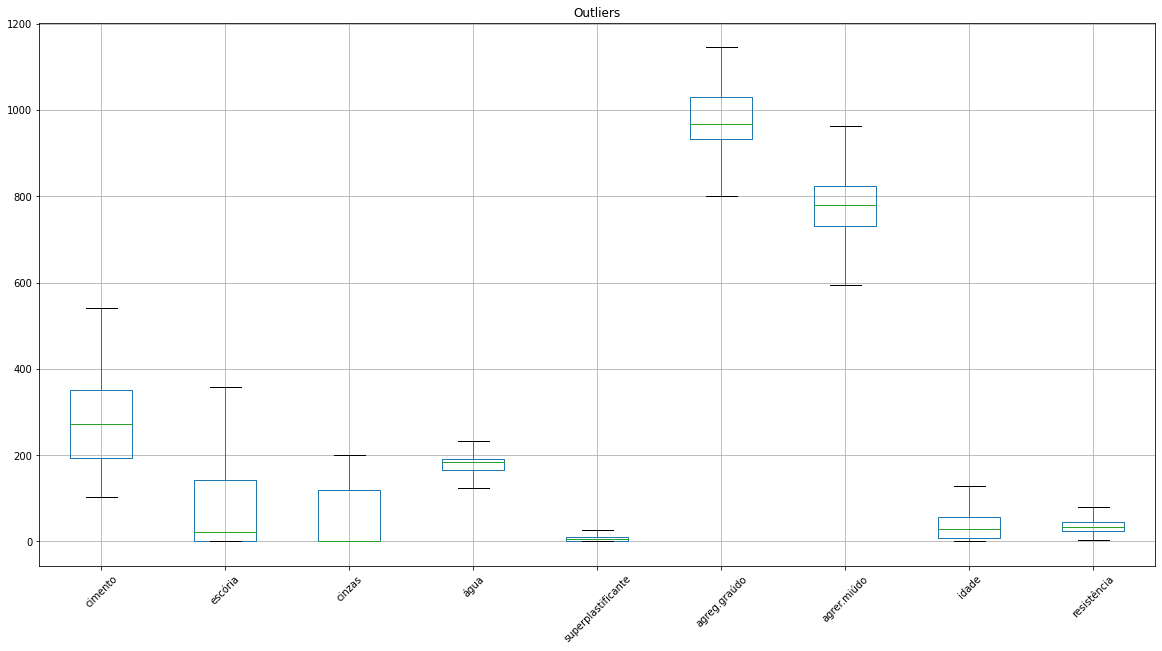

In [ ]:
concreto.boxplot(column = ['cimento', 'escória', 'cinzas', 'água', 'superplastificante', 'agreg.graúdo', 'agrer.miúdo', 'idade', 'resistência'], rot=45, figsize = (20,10))
plt.title('Outliers')

In [ ]:
X = concreto.drop('resistência', axis=1)
y = concreto['resistência']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
modelo = RandomForestRegressor(n_estimators=20000, random_state=0, n_jobs=-1)
modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15000, n_jobs=-1, random_state=0)

In [ ]:
previsao = modelo.predict(X_test)
previsao

In [ ]:
np.sqrt(mean_squared_error(y_test, previsao))

5.131250787936642

In [ ]:
r2_score(y_test, previsao)

0.9022935552800339

In [ ]:
features_importance = zip(modelo.feature_importances_, X)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s:%2.f%%" % (feature, importance*100))

idade:35%
cimento:29%
água:11%
superplastificante: 9%
escória: 7%
agrer.miúdo: 4%
agreg.graúdo: 3%
cinzas: 2%


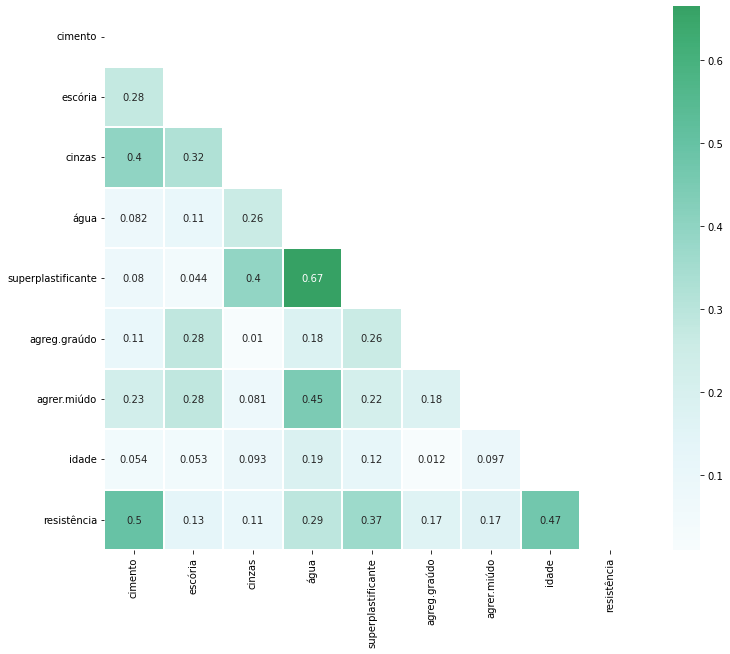

In [ ]:
corr = abs(concreto.corr())
lower_triangle = np.tril(corr, k = -1) 
mask = lower_triangle == 0  

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'BuGn', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)  
plt.show()